In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [2]:
## transforming data from txt file string to numpy array

## getting every line without /n seperator
ls = []
with open("data.txt","r") as f:
    for i in f:
        ls.append(i[:-1].split())

## defining function to turn string line to number list
def numerize(list1):
    numlist =[]
    for i in range(31):
        numlist.append(float(list1[i]))
    return numlist


##turning data's string lines to numbers
input_Data = []
for i in range(len(ls)):
    input_Data.append(numerize(ls[i]))

In [4]:
## defining to seperate input values and output values (input and target values)
def to_arr(list1):
    arr = []
    output = []
    for i in range(len(list1)):
        arr.append(np.array(list1[i][:-1]))
        output.append(list1[i][-1])
    return arr, output

## seperate input values and output values (input and target values) into list and turning them into numpy array
input_data, output_data = to_arr(input_Data)

input_data, output_data = np.array(input_data), np.array(output_data)

sep = 168
## seperating training and test data
x_train, y_train, x_test, y_test = input_data[:-sep], output_data[:-sep], input_data[-sep:], output_data[-sep:]



In [5]:
#building single layer model

model = Sequential()
model.add(Dense(2, activation="tanh")) ## for classification

model.compile(optimizer="adam", loss='mse', metrics="binary_accuracy") #assigning loss and accuracy formulas

model.fit(x= x_train, y= y_train, validation_data=(x_test,y_test),batch_size=20,epochs=75)

model.summary()

Epoch 1/75
20/20 [==============================] - 0s 8ms/step - loss: 0.6431 - binary_accuracy: 0.6288 - val_loss: 0.5474 - val_binary_accuracy: 0.6220
Epoch 2/75
20/20 [==============================] - 0s 2ms/step - loss: 0.4507 - binary_accuracy: 0.6325 - val_loss: 0.3729 - val_binary_accuracy: 0.6458
Epoch 3/75
20/20 [==============================] - 0s 2ms/step - loss: 0.3064 - binary_accuracy: 0.6650 - val_loss: 0.2581 - val_binary_accuracy: 0.6607
Epoch 4/75
20/20 [==============================] - 0s 2ms/step - loss: 0.2228 - binary_accuracy: 0.6913 - val_loss: 0.1933 - val_binary_accuracy: 0.6935
Epoch 5/75
20/20 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.7163 - val_loss: 0.1652 - val_binary_accuracy: 0.7173
Epoch 6/75
20/20 [==============================] - 0s 2ms/step - loss: 0.1596 - binary_accuracy: 0.7437 - val_loss: 0.1529 - val_binary_accuracy: 0.7589
Epoch 7/75
20/20 [==============================] - 0s 2ms/step - loss: 0.15

In [7]:
#building multiple layer model

model = Sequential()
model.add(Dense(60, activation="linear")) 
model.add(Dense(30, activation="relu"))
model.add(Dense(10, activation="linear"))
model.add(Dense(2, activation="tanh")) ## for classification

model.compile(optimizer="adam", loss='mean_absolute_error', metrics="binary_accuracy") #assigning loss and accuracy formulas

model.fit(x= x_train, y= y_train, validation_data=(x_test,y_test),batch_size=20,epochs=50)

model.summary()

Epoch 1/50
20/20 [==============================] - 0s 8ms/step - loss: 0.3993 - binary_accuracy: 0.7175 - val_loss: 0.3497 - val_binary_accuracy: 0.7589
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.3664 - binary_accuracy: 0.700 - 0s 2ms/step - loss: 0.3043 - binary_accuracy: 0.7075 - val_loss: 0.2789 - val_binary_accuracy: 0.8333
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2510 - binary_accuracy: 0.8512 - val_loss: 0.2283 - val_binary_accuracy: 0.9196
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2185 - binary_accuracy: 0.9087 - val_loss: 0.2054 - val_binary_accuracy: 0.9435
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1953 - binary_accuracy: 0.9287 - val_loss: 0.2080 - val_binary_accuracy: 0.9077
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1910 - binary_accuracy: 0.9300 - val_loss: 0.1745 - val_binary_accuracy: 0.9583
Epoch 7/50
20/20 [========

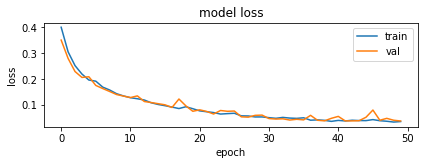

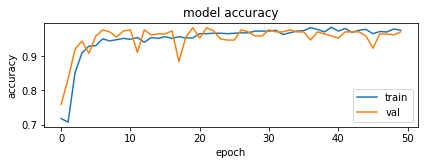

In [8]:
##plotting details

plt.subplot(212)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

plt.subplot(212)
plt.plot(model.history.history['binary_accuracy'])
plt.plot(model.history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.tight_layout()
plt.show()


In [9]:
## merging two data to evaluate
x_data = np.concatenate((x_train,x_test))
y_data = np.concatenate((y_train,y_test))

model.evaluate(x_data,y_data)

18/18 [==============================] - 0s 642us/step - loss: 0.0319 - binary_accuracy: 0.9780


[0.03185392916202545, 0.9779929518699646]